In [1]:
import pandas as pd
import numpy as np
from my_fun import summary_result

result_table_ridge = pd.read_csv("result/result_table_ridge.csv", sep = ",", header = [0,1], index_col = 0)
result_summary_ridge, result_plot_ridge = summary_result(result_table_ridge)

result_table_svr = pd.read_csv("result/result_table_svr.csv", sep = ",", header = [0,1], index_col = 0)
result_summary_svr, result_plot_svr = summary_result(result_table_svr)

result_table_gpr = pd.read_csv("result/result_table_gpr.csv", sep = ",", header = [0,1], index_col = 0)
result_summary_gpr, result_plot_gpr = summary_result(result_table_gpr)

result_table_dnn = pd.read_csv("result/result_table_dnn.csv", sep = ",", header = [0,1], index_col = 0)
result_summary_dnn, result_plot_dnn = summary_result(result_table_dnn)

In [2]:
result_summary_ridge

Pearson r            R square                 MAE            \
                 mean       std      mean       std      mean       std   
GMV          0.776464  0.054081  0.678168  0.069476  1.662248  0.156201   
ReHo         0.690547  0.060425  0.574400  0.074553  1.929254  0.207449   
ALFF         0.737930  0.039452  0.606082  0.045790  1.788308  0.134538   
FA           0.674677  0.085473  0.523841  0.102885  1.959115  0.170802   
MD           0.721669  0.045435  0.608367  0.048439  1.829479  0.149588   
GMV&DTI      0.847840  0.031211  0.771584  0.042045  1.396489  0.129012   
GMV&rsfMRI   0.822530  0.038928  0.726047  0.049350  1.473008  0.132284   
DTI&rsfMRI   0.813048  0.034283  0.714786  0.052459  1.550099  0.157414   
Multi-modal  0.844397  0.033264  0.766313  0.043960  1.413525  0.143462   

                 rmse            
                 mean       std  
GMV          2.071426  0.179940  
ReHo         2.364514  0.237864  
ALFF         2.218132  0.165486  
FA           2.432424  0.198274  
MD           2.285532  0.238979  
GMV&DTI      1.746017  0.146122  
GMV&rsfMRI   1.868599  0.142744  
DTI&rsfMRI   1.921555  0.155901  
Multi-modal  1.767657  0.155476

In [3]:
#result_table_ridge.loc[:, 'accuracy']
import pandas as pd
result_summary_ridge.loc[:, ['R square', 'MAE']]


result_summary_rsquared = pd.concat([result_summary_ridge.loc[:, ['R square', 'MAE']], \
                             result_summary_svr.loc[:, ['R square', 'MAE']], \
                             result_summary_gpr.loc[:, ['R square', 'MAE']], \
                             result_summary_dnn.loc[:, ['R square', 'MAE']]], \
                             axis = 1, keys = ['ridge', 'svr', 'gpr', 'dnn'])
# print(result_summary_rsquared)
result_summary_rsquared.to_csv('result/allsubjects/result_table_rsquared.csv')



In [4]:
result_summary_rsquared

ridge                                     svr            \
             R square                 MAE            R square             
                 mean       std      mean       std      mean       std   
GMV          0.678168  0.069476  1.662248  0.156201  0.639821  0.102266   
ReHo         0.574400  0.074553  1.929254  0.207449  0.564840  0.069135   
ALFF         0.606082  0.045790  1.788308  0.134538  0.608413  0.053042   
FA           0.523841  0.102885  1.959115  0.170802  0.510107  0.082335   
MD           0.608367  0.048439  1.829479  0.149588  0.587500  0.078683   
GMV&DTI      0.771584  0.042045  1.396489  0.129012  0.746663  0.051639   
GMV&rsfMRI   0.726047  0.049350  1.473008  0.132284  0.722154  0.069596   
DTI&rsfMRI   0.714786  0.052459  1.550099  0.157414  0.706273  0.061247   
Multi-modal  0.766313  0.043960  1.413525  0.143462  0.756452  0.059867   

                                      gpr                                \
                  MAE            R square                 MAE             
                 mean       std      mean       std      mean       std   
GMV          1.698807  0.187821  0.672682  0.069235  1.649407  0.152647   
ReHo         1.931235  0.196856  0.578660  0.072522  1.923916  0.211372   
ALFF         1.803091  0.150151  0.620809  0.044483  1.769566  0.127919   
FA           2.002711  0.163871  0.533210  0.096774  1.964608  0.158889   
MD           1.948644  0.113282  0.621440  0.052942  1.845484  0.157650   
GMV&DTI      1.439781  0.106172  0.767515  0.046065  1.394864  0.129206   
GMV&rsfMRI   1.519455  0.122582  0.732193  0.051487  1.463387  0.142588   
DTI&rsfMRI   1.519554  0.143978  0.721555  0.053011  1.511550  0.146924   
Multi-modal  1.426267  0.135080  0.774284  0.042843  1.383504  0.129323   

                  dnn                                
             R square                 MAE            
                 mean       std      mean       std  
GMV          0.580560  0.096022  1.837042  0.199204  
ReHo         0.568700  0.067910  1.934029  0.163186  
ALFF         0.592157  0.065289  1.810753  0.096369  
FA           0.399130  0.107234  2.392100  0.145013  
MD           0.473673  0.071045  2.177401  0.240636  
GMV&DTI      0.737213  0.052040  1.435893  0.119818  
GMV&rsfMRI   0.713075  0.044713  1.465257  0.128744  
DTI&rsfMRI   0.694125  0.046594  1.519518  0.156565  
Multi-modal  0.752533  0.053123  1.380873  0.118980

In [5]:
accuracy_mean = result_summary_rsquared.xs('R square', axis = 1, level = 1).xs('mean', axis = 1, level = 1)
accuracy_mean.reset_index(level = 0, inplace = True)
accuracy_mean.rename(columns ={'index':'feature'}, inplace = True)

#accuracy_mean.loc[:, 'feature'] = ['GMV', 'ReHo', 'ALFF', 'FA', 'MD', 'Multimodal']


print(accuracy_mean)


       feature     ridge       svr       gpr       dnn
0          GMV  0.678168  0.639821  0.672682  0.580560
1         ReHo  0.574400  0.564840  0.578660  0.568700
2         ALFF  0.606082  0.608413  0.620809  0.592157
3           FA  0.523841  0.510107  0.533210  0.399130
4           MD  0.608367  0.587500  0.621440  0.473673
5      GMV&DTI  0.771584  0.746663  0.767515  0.737213
6   GMV&rsfMRI  0.726047  0.722154  0.732193  0.713075
7   DTI&rsfMRI  0.714786  0.706273  0.721555  0.694125
8  Multi-modal  0.766313  0.756452  0.774284  0.752533


In [13]:
result_table_all = pd.concat([result_table_ridge.loc[:,'R square'], \
                             result_table_svr.loc[:,'R square'], \
                             result_table_gpr.loc[:,'R square'], \
                             result_table_dnn.loc[:,'R square']], \
                             axis = 0, keys = ['ridge', 'svr', 'gpr', 'dnn'])

result_table_all.reset_index(inplace = True)
result_table_all.rename(index = str, columns = {'level_0': 'method', 'level_1': 'feature'}, inplace = True)

# print(result_table_all)

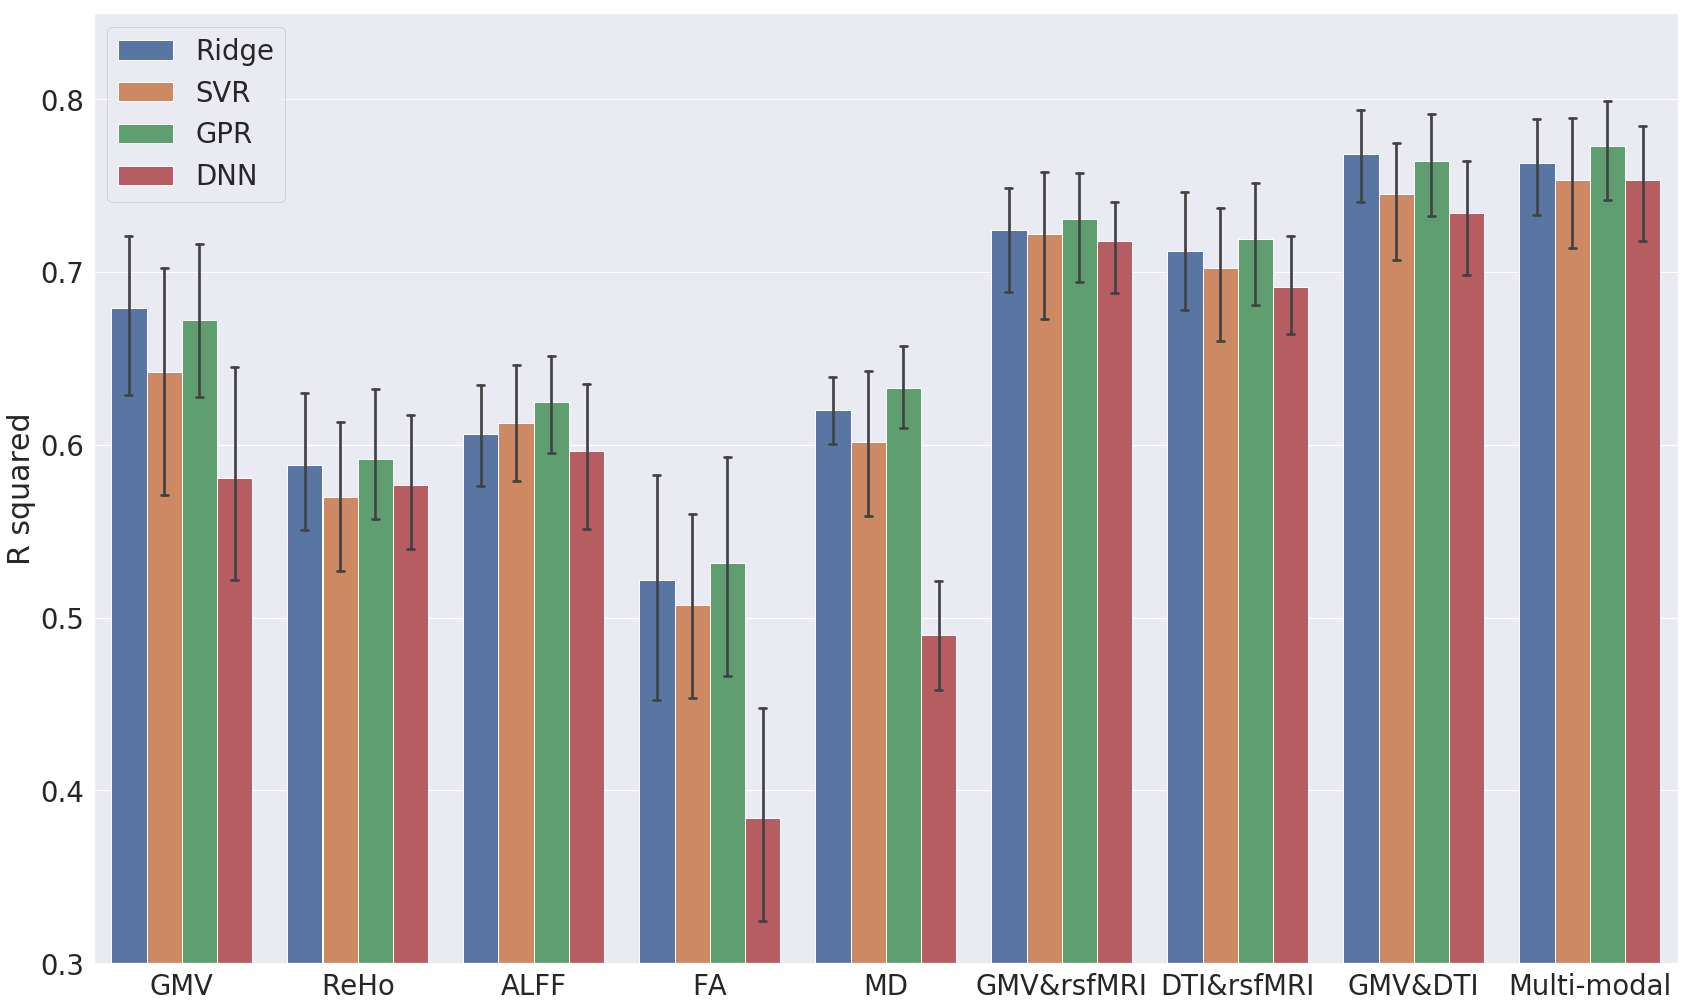

In [14]:
# plot accuracy of different methods with different brain imaging features
import matplotlib.pyplot as plt
import seaborn as sns

# accuracy_plot = pd.melt(result_table_all, id_vars=['feature', 'method'], \
#                         value_vars=['boot' + str(i) for i in range(1, 10, 1)]\ 
#                         var_name = ['method'], value_name = "correlation")

accuracy_plot = pd.melt(result_table_all, 
                        id_vars=['feature', 'method'],
                        value_vars=['boot' + str(i) for i in range(1, 10, 1)],
                        value_name = "correlation")

accuracy_plot = accuracy_plot.replace({'method': {'ridge': 'Ridge', 'svr': 'SVR', 'gpr': 'GPR', 'dnn': 'DNN'}})

# print(accuracy_plot)
#plot_order = ['GMV', 'ReHo', 'ALFF', 'FA', 'MD', 'Multi-modal']
plot_order = ['GMV', 'ReHo', 'ALFF', 'FA', 'MD', 'GMV&rsfMRI', 'DTI&rsfMRI', 'GMV&DTI', 'Multi-modal']

sns.set(rc={'figure.figsize':(25,15)}, font_scale = 2.5)
plt.figure()
ax = sns.barplot(x="feature", y="correlation", hue="method", data=accuracy_plot, \
                 order = plot_order, capsize=.04)

# ax = sns.barplot(x="feature", y="correlation", hue="method", data=accuracy_plot, capsize = .04)

plt.legend(loc='upper left')
plt.ylim(.3,.85)
ax.set_ylabel('R squared') 
ax.set_xlabel('')
plt.subplots_adjust(left = .07, bottom = .07, right = .95, top = .95)
# plt.margins(.01)
#plt.savefig('figure/figure1_prediction_accuracy_rsquared.png', dpi=300)
plt.savefig('figure/figure1_prediction_accuracy_rsquared.jpg', dpi=300)

In [8]:
#result_table_ridge.loc[:, 'accuracy']
import pandas as pd
result_summary_ridge.loc[:, ['Pearson r', 'MAE']]


result_summary_all = pd.concat([result_summary_ridge.loc[:, ['Pearson r', 'MAE']], \
                             result_summary_svr.loc[:, ['Pearson r', 'MAE']], \
                             result_summary_gpr.loc[:, ['Pearson r', 'MAE']], \
                             result_summary_dnn.loc[:, ['Pearson r', 'MAE']]], \
                             axis = 1, keys = ['ridge', 'svr', 'gpr', 'dnn'])
# print(result_summary_all)
result_summary_all.to_csv('result/allsubjects/result_table_pearsonr.csv')


accuracy_mean = result_summary_all.xs('Pearson r', axis = 1, level = 1).xs('mean', axis = 1, level = 1)
accuracy_mean.reset_index(level = 0, inplace = True)
accuracy_mean.rename(columns ={'index':'feature'}, inplace = True)

#accuracy_mean.loc[:, 'feature'] = ['GMV', 'ReHo', 'ALFF', 'FA', 'MD', 'Multimodal']

# square of correlation:
print(np.square(accuracy_mean.iloc[:, 1:5]))

print(accuracy_mean.iloc[:, 1:5])

      ridge       svr       gpr       dnn
0  0.602897  0.575975  0.601263  0.500914
1  0.476855  0.483803  0.481152  0.487053
2  0.544540  0.546578  0.555446  0.530673
3  0.455188  0.425935  0.457090  0.303978
4  0.520805  0.462742  0.515404  0.401952
5  0.718833  0.693985  0.718564  0.692084
6  0.676555  0.674589  0.681303  0.675660
7  0.661048  0.668019  0.669040  0.661861
8  0.713006  0.706015  0.723709  0.712911
      ridge       svr       gpr       dnn
0  0.776464  0.758930  0.775411  0.707753
1  0.690547  0.695559  0.693651  0.697892
2  0.737930  0.739309  0.745282  0.728473
3  0.674677  0.652637  0.676084  0.551342
4  0.721669  0.680251  0.717916  0.633997
5  0.847840  0.833058  0.847682  0.831916
6  0.822530  0.821334  0.825411  0.821985
7  0.813048  0.817324  0.817949  0.813549
8  0.844397  0.840247  0.850711  0.844341


In [9]:
result_table_all = pd.concat([result_table_ridge.loc[:,'Pearson r'], \
                             result_table_svr.loc[:,'Pearson r'], \
                             result_table_gpr.loc[:,'Pearson r'], \
                             result_table_dnn.loc[:,'Pearson r']], \
                             axis = 0, keys = ['ridge', 'svr', 'gpr', 'dnn'])

result_table_all.reset_index(inplace = True)
result_table_all.rename(index = str, columns = {'level_0': 'method', 'level_1': 'feature'}, inplace = True)

#print(result_table_all)

Text(0.5,0,'')

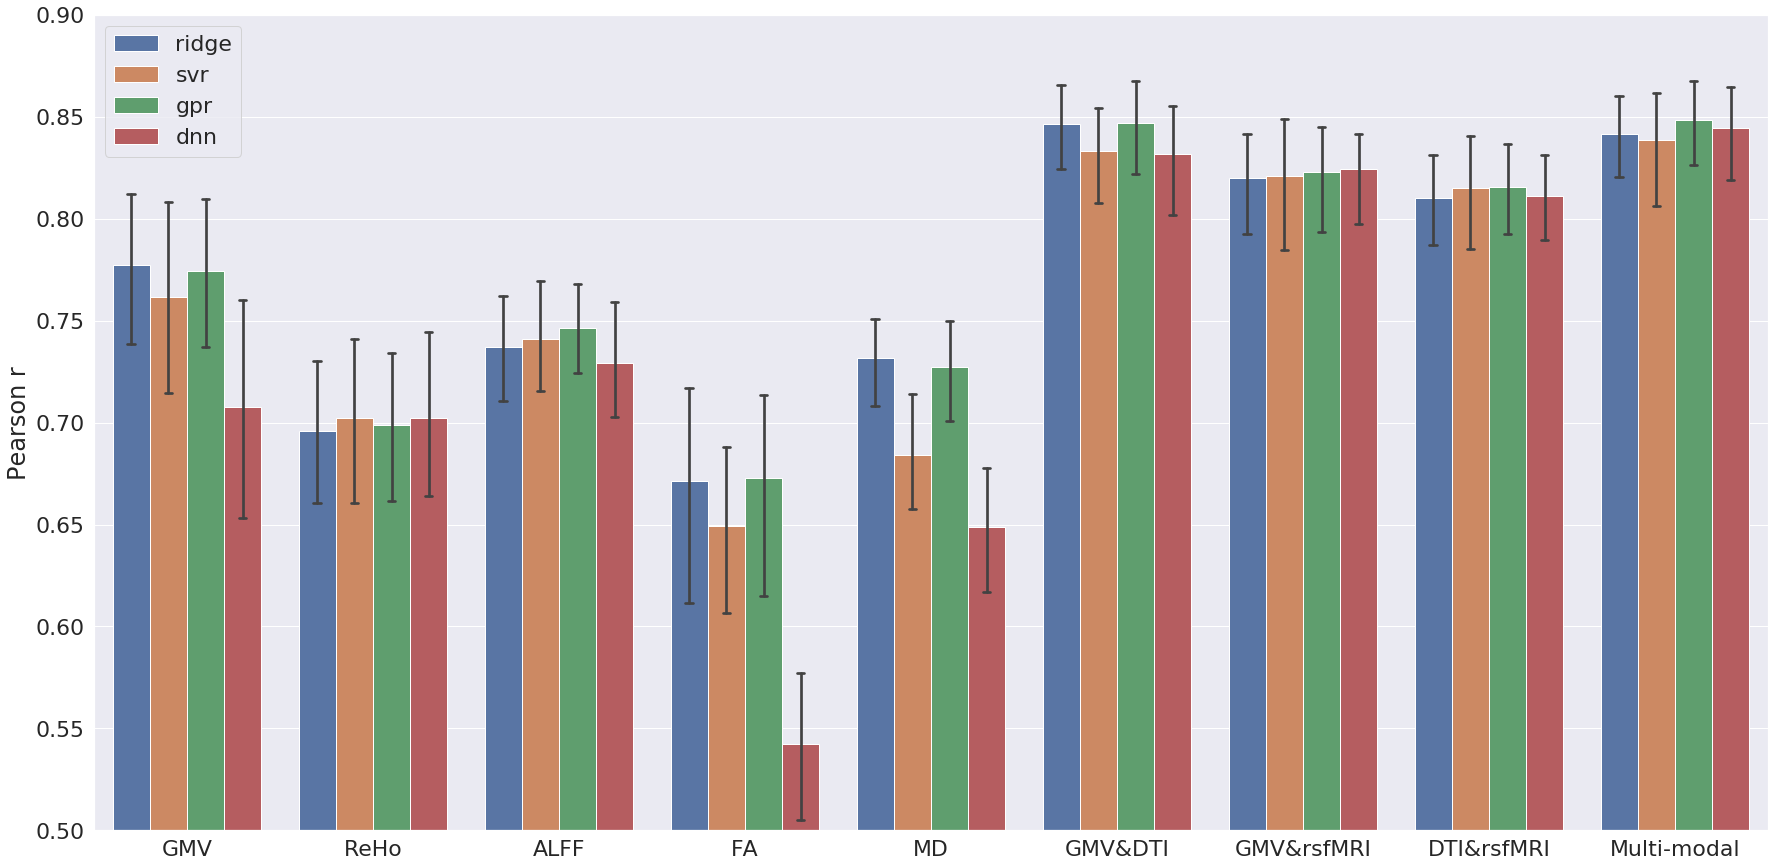

In [11]:
# plot accuracy of different methods with different brain imaging features
import matplotlib.pyplot as plt
import seaborn as sns

# accuracy_plot = pd.melt(result_table_all, id_vars=['feature', 'method'], \
#                         value_vars=['boot' + str(i) for i in range(1, 10, 1)]\ 
#                         var_name = ['method'], value_name = "correlation")

accuracy_plot = pd.melt(result_table_all, 
                        id_vars=['feature', 'method'],
                        value_vars=['boot' + str(i) for i in range(1, 10, 1)],
                        value_name = "correlation")

# print(accuracy_plot)

plt.figure()
sns.set(rc={'figure.figsize':(30,15)}, font_scale = 2)
# ax = sns.barplot(x="feature", y="correlation", hue="method", data=accuracy_plot, \
#                  order = ['GMV', 'ReHo', 'ALFF', 'FA', 'MD', 'Multi-modal'], capsize=.04)

ax = sns.barplot(x="feature", y="correlation", hue="method", data=accuracy_plot, \
                capsize=.04)

plt.legend(loc='upper left')
plt.ylim(.5,.9)
ax.set_ylabel('Pearson r')  
ax.set_xlabel('')